# Results from evaluating the systems

In this notebook the main findings of the experiments are shown using the School and Air datasets on the two approaches introduced in "Feature augmentation with reinforcement learning" paper.

Hereby, we present briefly the benefits and drawbacks of each:

Multi-armed bandit:
- Benefits:
    - quick to train in terms of runtime complexity;
    - good accuracy is small number of iterations;
- Drawbacks:
    - joins have to be performed to test the performance;

Branch DQN:
- Benefits:
    - We did not discover any benefits while running the code of the approach
- Drawbacks:
    - computationally slow to train;
    - learning rate is not particularly helpful;
    - joins have to be performed to test the performance;
    
In code, both of the approaches require that the PK-FK relation has the same column names.

The train-test split is performed before joining the tables. Therefore, train base table is joined with train foreign tables and the same goes for test.

Both approaches appear to perform "cartesian" joins and due to that a machine can quickly run out of RAM when performing joins.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
air_mab = pd.read_csv('air_mab.csv', delimiter=';')

In [3]:
air_rl = pd.read_csv('air_rl.csv', delimiter=';')

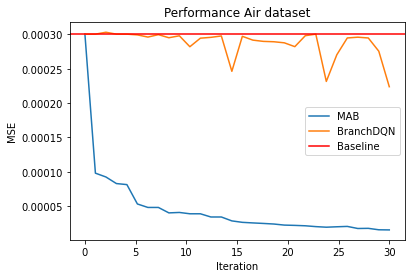

In [4]:
plt.plot(np.linspace(0, 30, 30), air_mab[[' accuracy']].iloc[:30], label='MAB')
plt.plot(np.linspace(0, 30, 30), air_rl[[' accuracy']].iloc[:30], label='BranchDQN')
plt.axhline(y=0.00030039148512013233, color='r', linestyle='-', label='Baseline')
plt.legend()
plt.title('Performance Air dataset')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [5]:
school_mab = pd.read_csv('school_big_mab.csv', delimiter=';')
school_rl = pd.read_csv('school_big_rl.csv', delimiter=';')

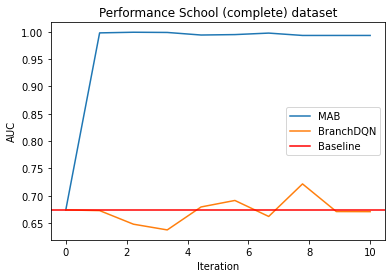

In [6]:
plt.plot(np.linspace(0, 10, 10), school_mab[[' accuracy']][:10], label='MAB')
plt.plot(np.linspace(0, 10, 10), school_rl[[' accuracy']][:10], label='BranchDQN')
plt.axhline(y=0.6741152450090744, color='r', linestyle='-',label='Baseline')
plt.legend()
plt.title('Performance School (complete) dataset')
plt.xlabel('Iteration')
plt.ylabel('AUC')
plt.show()

In [7]:
school_small_mab = pd.read_csv('school_small_mab.csv', delimiter=';')
school_small_rl = pd.read_csv('school_small_rl.csv', delimiter=';')

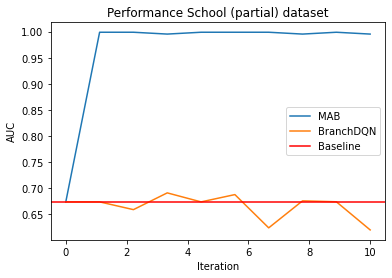

In [8]:
plt.plot(np.linspace(0, 10, 10), school_small_mab[[' accuracy']][:10], label='MAB')
plt.plot(np.linspace(0, 10, 10), school_small_rl[[' accuracy']][:10], label='BranchDQN')
plt.axhline(y=0.6741152450090744, color='r', linestyle='-',label='Baseline')
plt.legend()
plt.title('Performance School (partial) dataset')
plt.xlabel('Iteration')
plt.ylabel('AUC')
plt.show()